In [3]:
# imports
import os
from datasets import load_from_disk
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw

In [10]:

data_dir = '/Volumes/DATA/project1/data/raw/funsd'
dataset = load_from_disk(data_dir)
train = dataset['train']
print(train.features)

{'id': Value(dtype='string', id=None), 'words': Sequence(feature=Value(dtype='string', id=None), length=-1, id=None), 'bboxes': Sequence(feature=Sequence(feature=Value(dtype='int64', id=None), length=-1, id=None), length=-1, id=None), 'ner_tags': Sequence(feature=ClassLabel(names=['O', 'B-HEADER', 'I-HEADER', 'B-QUESTION', 'I-QUESTION', 'B-ANSWER', 'I-ANSWER'], id=None), length=-1, id=None), 'image_path': Value(dtype='string', id=None)}


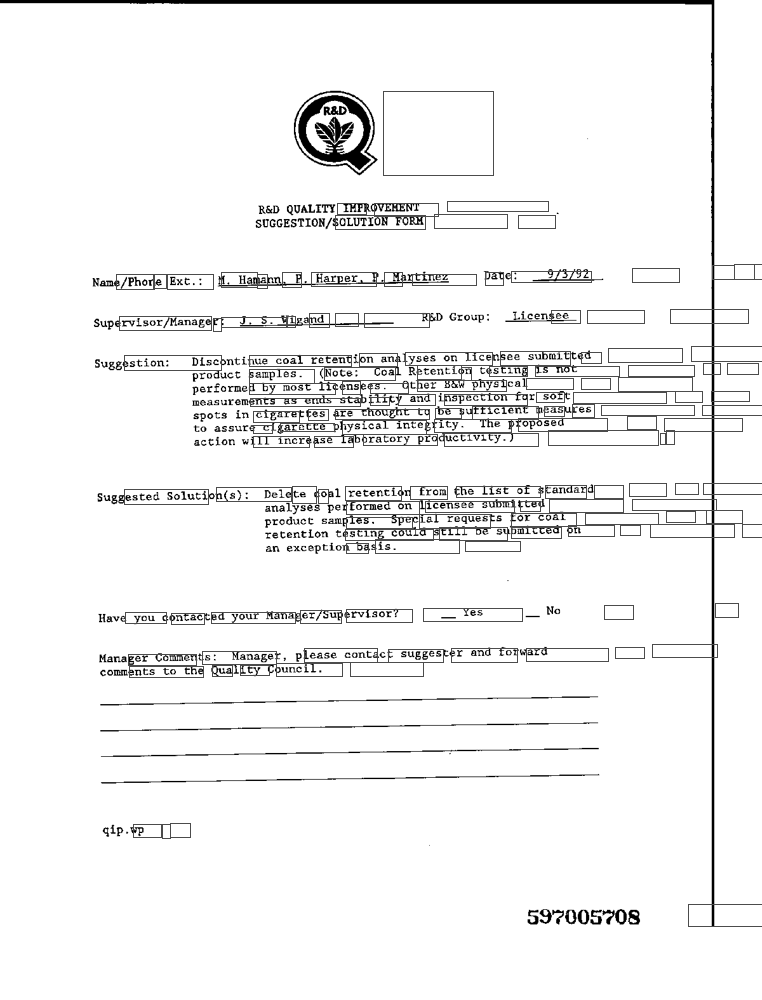

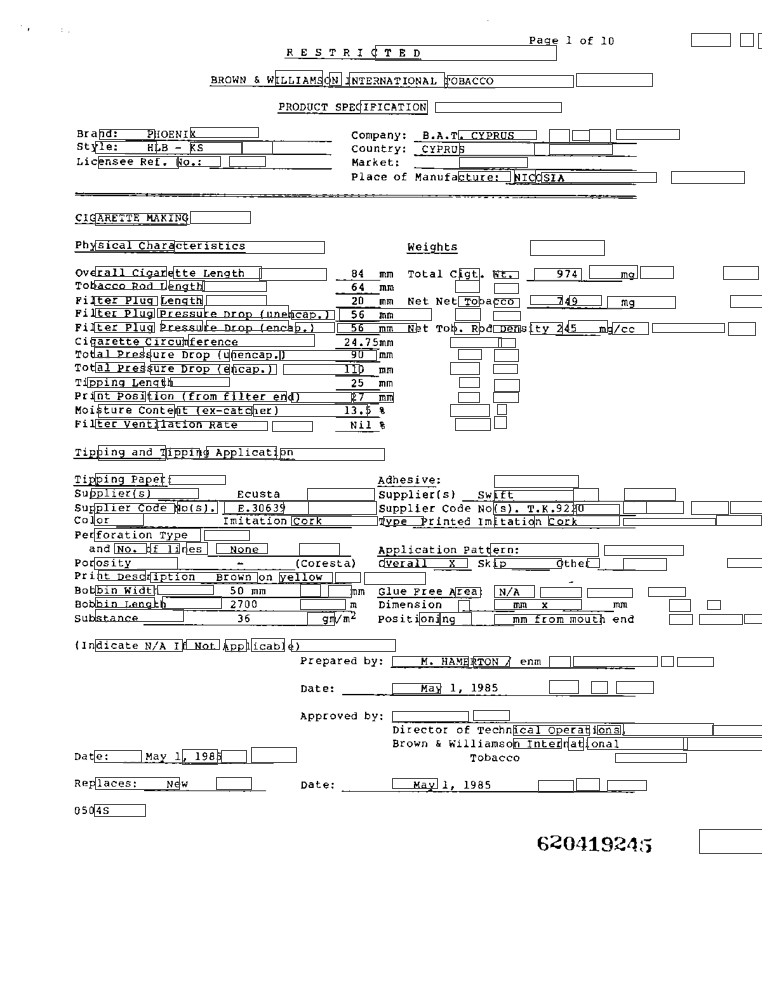

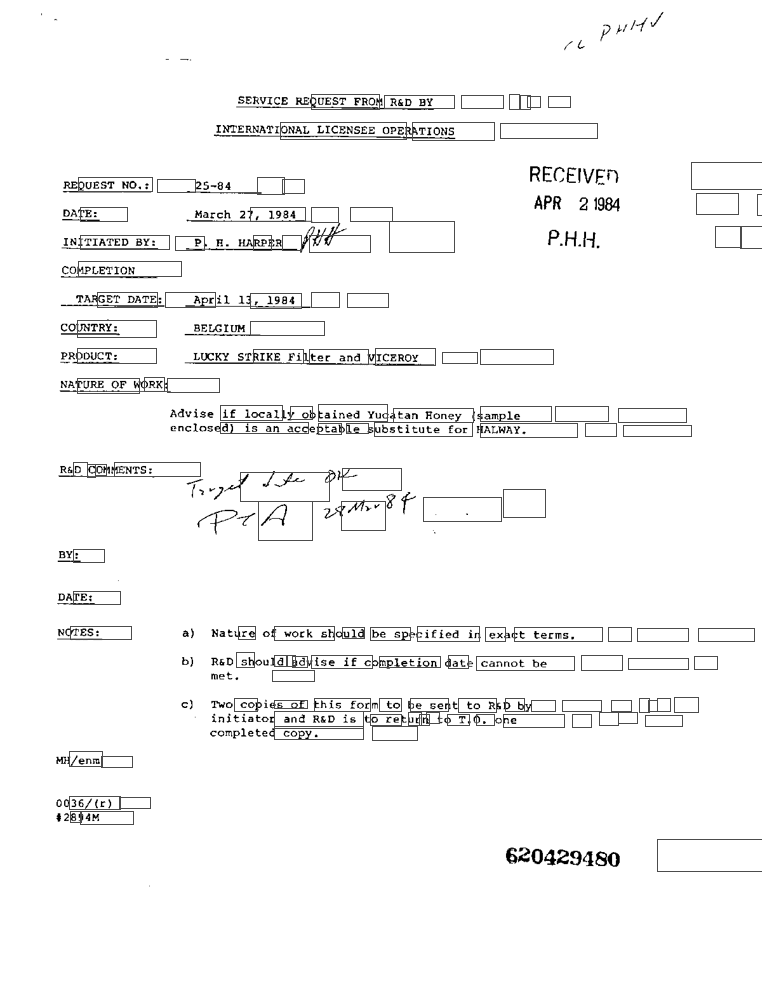

In [11]:
# display first 3 examples
for idx in range(3):
    example = train[idx]
    img = Image.open(example['image_path'])  # ensure 'image_path' exists
    draw = ImageDraw.Draw(img)
    for bbox, tag in zip(example['bboxes'], example['ner_tags']):
        draw.rectangle(bbox, outline='red')
    display(img)

In [12]:
from collections import Counter
labels = [lbl for tags in train['ner_tags'] for lbl in tags]
counts = Counter(labels)
import pandas as pd
pd.DataFrame.from_dict(counts, orient='index', columns=['count'])

,count
0,3632
3,3253
5,2732
1,441
2,1035
4,4008
6,6787
